In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np

# Importing data

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

def plot_images(images, labels, classes):
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.title(classes[labels[i][0]])
        plt.axis('off')
    plt.show()



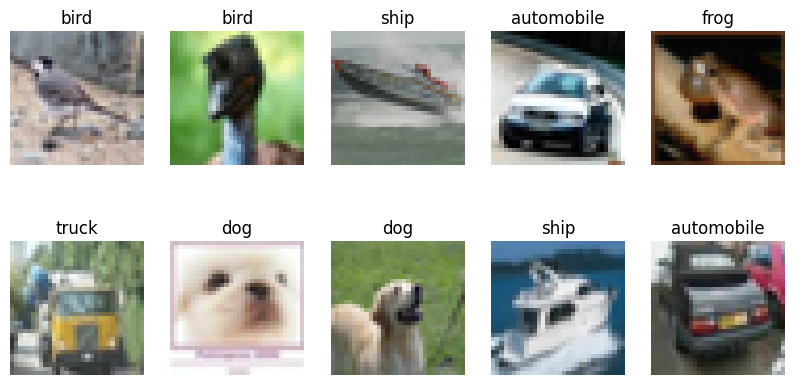

In [ ]:

cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                 'dog', 'frog', 'horse', 'ship', 'truck']
random_indices = random.sample(range(len(x_train)), 10)
plot_images(x_train[random_indices], y_train[random_indices], cifar_classes)

#Preprocessing the data Plane


**Plane images are treated as normal images**

**Rest all other classes are anomalies**

In [ ]:
len(np.where(y_train==0))

2

In [ ]:
np.where(y_train==0)

(array([   29,    30,    35, ..., 49941, 49992, 49994]),
 array([0, 0, 0, ..., 0, 0, 0]))

In [ ]:
normal_data = x_train[np.where(y_train == 0)[0]]

In [ ]:
len(x_train)

50000

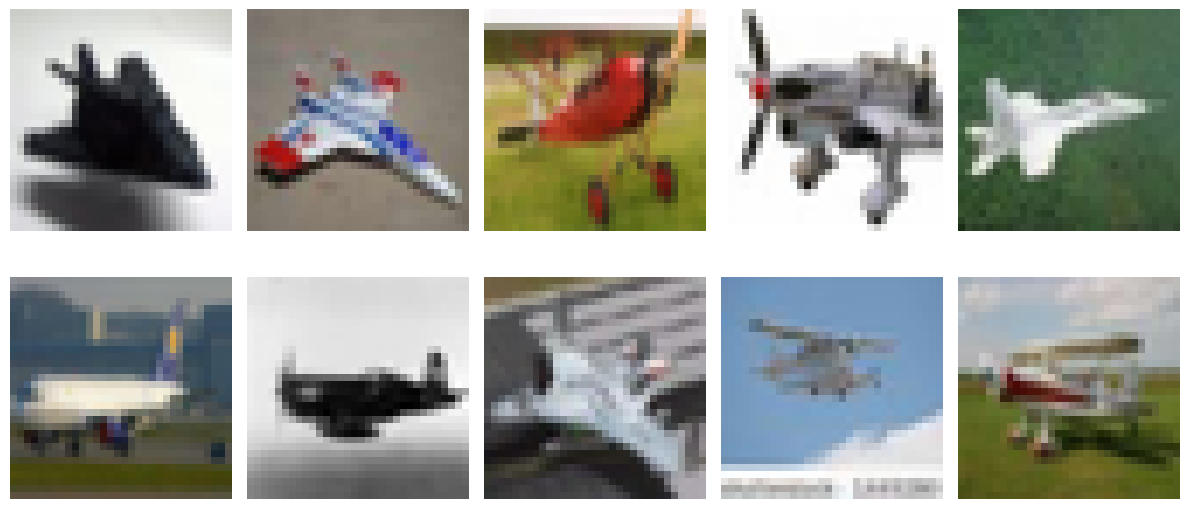

In [ ]:
import matplotlib.pyplot as plt

def show_images(images, num_images=10):
    plt.figure(figsize=(12, 6))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_images(normal_data)


In [ ]:
# Preprocess data (normalize pixel values)
normal_data = normal_data.astype('float32') / 255.0

In [ ]:
np.where(y_train != 0)

(array([    0,     1,     2, ..., 49997, 49998, 49999]),
 array([0, 0, 0, ..., 0, 0, 0]))

In [ ]:
np.where(y_train != 0)[0]

array([    0,     1,     2, ..., 49997, 49998, 49999])

In [ ]:
anomalous_data = x_train[np.where(y_train != 0)[0]]

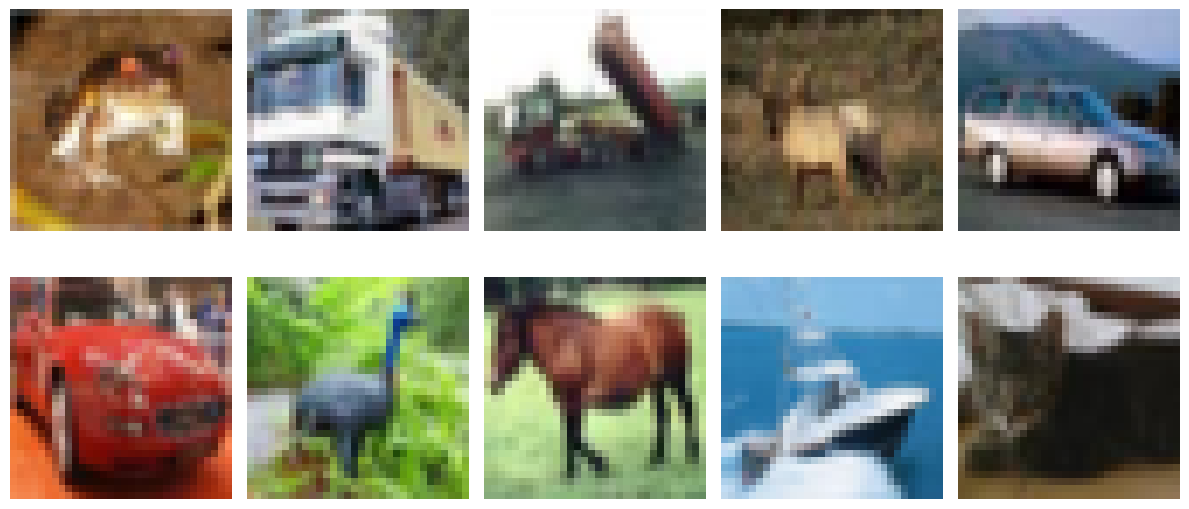

In [ ]:
show_images(anomalous_data)

In [ ]:
def create_autoencoder():
  inputs = layers.Input(shape=(32, 32, 3))

  # Encoder
  x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
  x = layers.MaxPooling2D((2, 2), padding='same')(x)
  x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
  x = layers.MaxPooling2D((2, 2), padding='same')(x)
  encoded = layers.Flatten()(x)

  # Decoder
# Decoder
  x = layers.Dense(16 * 16 * 64, activation='relu')(encoded)  # Adjusted for the last pooling output shape
  x = layers.Reshape((16, 16, 64))(x)  # Reshape to match the last pooling operation in the encoder
  x = layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
  x = layers.UpSampling2D((2, 2))(x)
  x = layers.Conv2DTranspose(3, (3, 3), activation='sigmoid', padding='same')(x)
  outputs = x


  autoencoder = tf.keras.Model(inputs=inputs, outputs=outputs)
  return autoencoder

In [ ]:
model_plane = create_autoencoder()
model_plane.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 4096)              0     

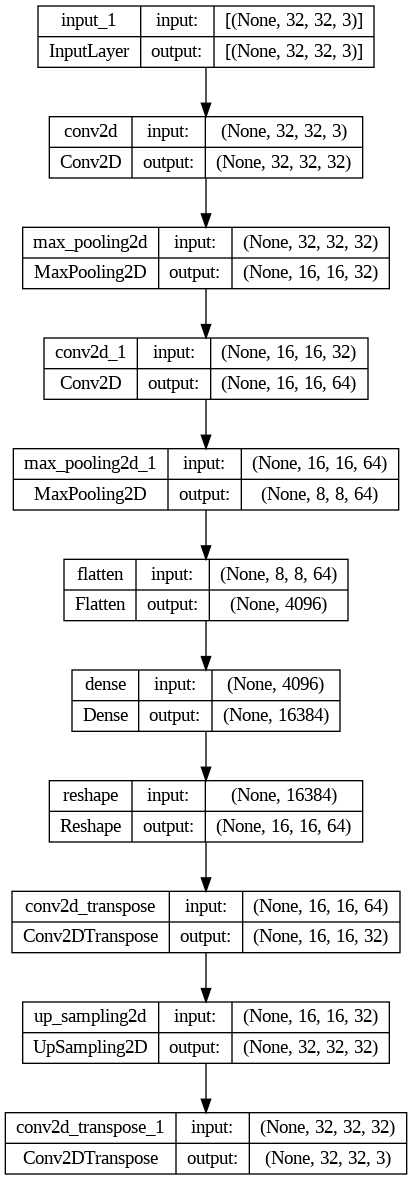

In [ ]:

from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model_plane, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
Image('model_plot.png')

**Model is trained on normal data**

In [ ]:
model_plane.compile(optimizer='adam', loss='mse')
model_plane.fit(normal_data, normal_data, epochs=10, batch_size=32)

Epoch 1/10
157/157 [==============================] - 260s 2s/step - loss: 0.0254
Epoch 2/10
157/157 [==============================] - 272s 2s/step - loss: 0.0087
Epoch 3/10
157/157 [==============================] - 264s 2s/step - loss: 0.0066
Epoch 4/10
157/157 [==============================] - 285s 2s/step - loss: 0.0055
Epoch 5/10
157/157 [==============================] - 269s 2s/step - loss: 0.0050
Epoch 6/10
157/157 [==============================] - 278s 2s/step - loss: 0.0044
Epoch 7/10
157/157 [==============================] - 265s 2s/step - loss: 0.0041
Epoch 8/10
157/157 [==============================] - 262s 2s/step - loss: 0.0038
Epoch 9/10
157/157 [==============================] - 278s 2s/step - loss: 0.0036
Epoch 10/10
157/157 [==============================] - 260s 2s/step - loss: 0.0033


In [ ]:
normal_reconstructions = model_plane.predict(normal_data)
anomalous_reconstructions = model_plane.predict(anomalous_data)

1407/1407 [==============================] - 195s 139ms/step


In [ ]:
normal_errors = tf.keras.losses.mean_squared_error(normal_data, normal_reconstructions)
anomalous_errors = tf.keras.losses.mean_squared_error(anomalous_data, anomalous_reconstructions)

In [ ]:
threshold = np.mean(normal_errors) + 3 * np.std(normal_errors)

In [ ]:
normal_predictions = normal_errors < threshold
anomalous_predictions = anomalous_errors >= threshold

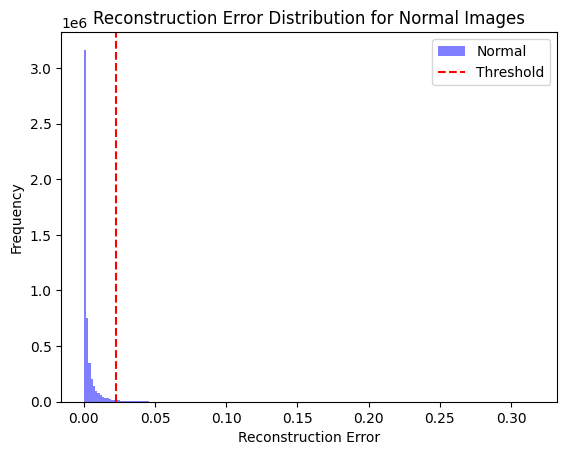

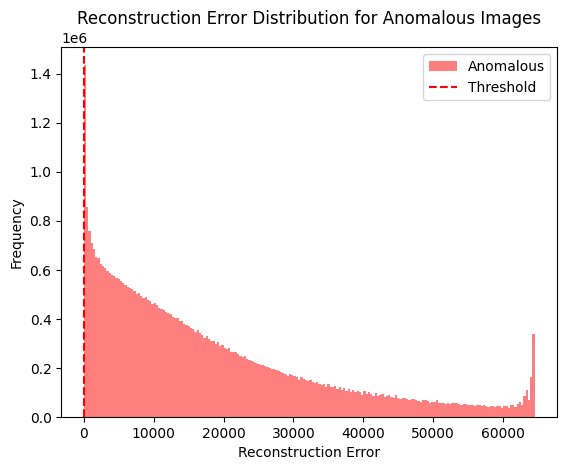

In [ ]:
# Calculate reconstruction errors for normal and anomalous data
normal_errors = tf.keras.losses.mean_squared_error(normal_data, normal_reconstructions)
anomalous_errors = tf.keras.losses.mean_squared_error(anomalous_data, anomalous_reconstructions)

# Set threshold for anomaly detection based on normal data errors
threshold = np.mean(normal_errors) + 3 * np.std(normal_errors)  # Adjust threshold as needed
normal_errors_flat = normal_errors.numpy().flatten()
# Visualize reconstruction errors for normal data
plt.hist(normal_errors_flat, bins=200, color='blue', alpha=0.5, label='Normal')
plt.axvline(x=threshold, color='r', linestyle='--', label='Threshold')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Reconstruction Error Distribution for Normal Images')
plt.legend()
plt.show()

# Visualize reconstruction errors for anomalous data
anomalous_errors_flat = anomalous_errors.numpy().flatten()
plt.hist(anomalous_errors_flat, bins=200, color='red', alpha=0.5, label='Anomalous')
plt.axvline(x=threshold, color='r', linestyle='--', label='Threshold')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Reconstruction Error Distribution for Anomalous Images')
plt.legend()
plt.show()

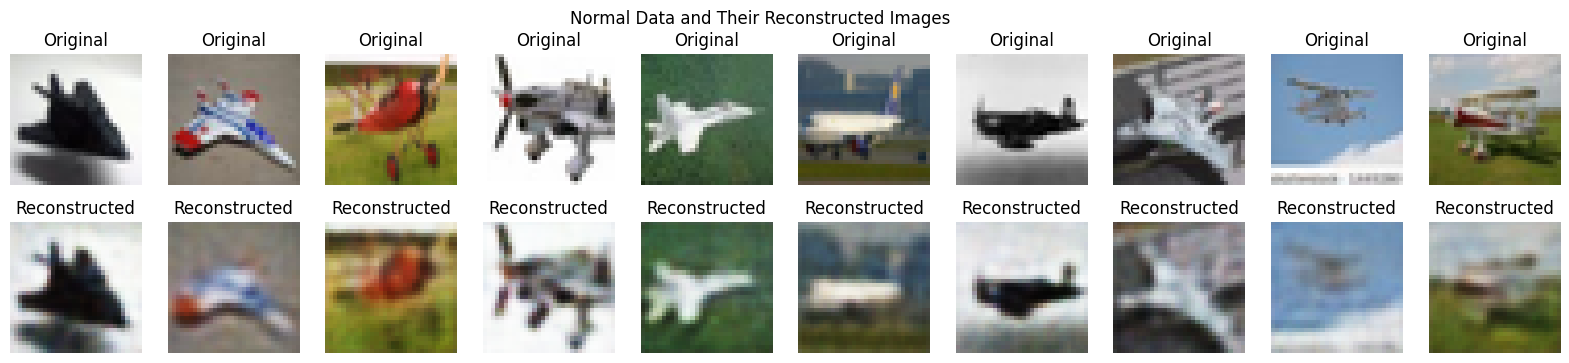

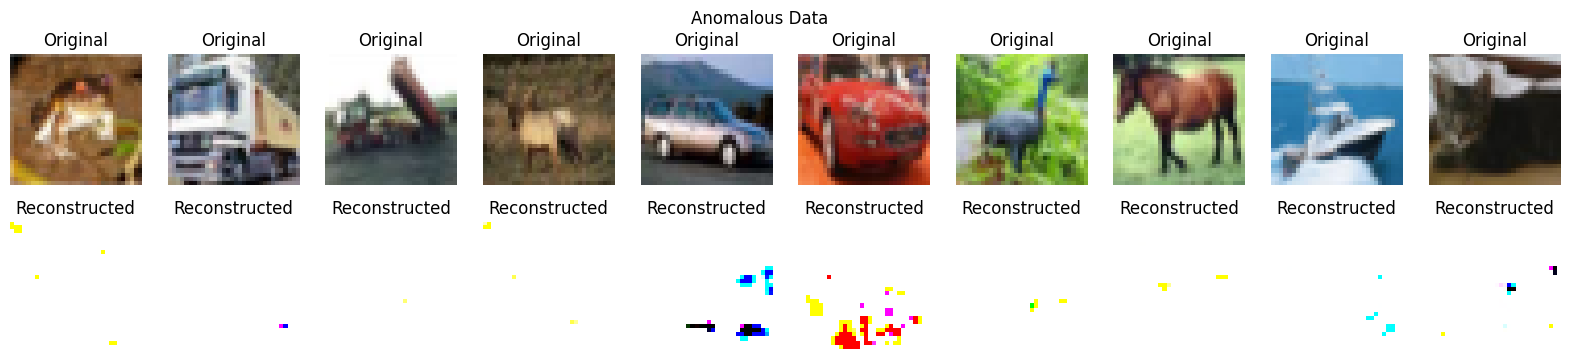

In [ ]:
import matplotlib.pyplot as plt

def plot_images(original_images, reconstructed_images, title):
    plt.figure(figsize=(20, 4))
    for i in range(10):
        # Original images
        plt.subplot(2, 10, i + 1)
        plt.imshow(original_images[i])
        plt.title('Original')
        plt.axis('off')

        # Reconstructed images
        plt.subplot(2, 10, i + 11)
        plt.imshow(reconstructed_images[i])
        plt.title('Reconstructed')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

plot_images(normal_data[:10], normal_reconstructions[:10], 'Normal Data and Their Reconstructed Images')

plot_images(anomalous_data[:10], anomalous_reconstructions[:10], 'Anomalous Data')

In [ ]:
from sklearn.metrics import roc_auc_score

# Convert TensorFlow tensors to NumPy arrays
normal_predictions_np = normal_predictions.numpy().ravel()
anomalous_predictions_np = anomalous_predictions.numpy().ravel()

# Combine normal and anomalous predictions and errors
all_predictions = np.concatenate([normal_predictions_np, anomalous_predictions_np])
all_errors = np.concatenate([normal_errors.numpy().ravel(), anomalous_errors.numpy().ravel()])

# Create labels: 0 for normal (negative class), 1 for anomalous (positive class)
true_labels = np.concatenate([np.zeros_like(normal_predictions_np), np.ones_like(anomalous_predictions_np)])

# Calculate AUC
auc_score = roc_auc_score(true_labels, all_errors)

print("AUC Score:", auc_score)




AUC Score: 0.9993651192613155


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.125,
    height_shift_range=0.125,
    zoom_range=[0.8, 1.2],
)

normal_generator = datagen.flow(normal_data, shuffle=False, batch_size=normal_data.shape[0])

anomalous_generator = datagen.flow(anomalous_data, shuffle=False, batch_size=anomalous_data.shape[0])

normal_augmented_data = normal_generator.next()
anomalous_augmented_data = anomalous_generator.next()
anomalous_augmented_data = anomalous_augmented_data/ 255.0

In [ ]:
# Predict on augmented normal data
normal_augmented_reconstructions = model_plane.predict(normal_augmented_data)

# Predict on augmented anomalous data
anomalous_augmented_reconstructions = model_plane.predict(anomalous_augmented_data)


1407/1407 [==============================] - 227s 162ms/step


In [ ]:
normal_aug_errors = tf.keras.losses.mean_squared_error(normal_augmented_data, normal_augmented_reconstructions)
anomalous_aug_errors = tf.keras.losses.mean_squared_error(anomalous_augmented_data, anomalous_augmented_reconstructions)

In [ ]:
threshold_aug = np.mean(normal_aug_errors) + 2 * np.std(normal_aug_errors)

In [ ]:
threshold_aug

0.017233265563845634

In [ ]:
normal_aug_predictions = normal_aug_errors < threshold_aug
anomalous_aug_predictions = anomalous_aug_errors >= threshold_aug

In [ ]:
from sklearn.metrics import roc_auc_score

# Convert TensorFlow tensors to NumPy arrays
normal_aug_predictions_np = normal_aug_predictions.numpy().ravel()
anomalous_aug_predictions_np = anomalous_aug_predictions.numpy().ravel()

# Combine normal and anomalous predictions and errors
all_predictions = np.concatenate([normal_aug_predictions_np, anomalous_aug_predictions_np])
all_errors = np.concatenate([normal_aug_errors.numpy().ravel(), anomalous_aug_errors.numpy().ravel()])

# Create labels: 0 for normal (negative class), 1 for anomalous (positive class)
true_labels = np.concatenate([np.zeros_like(normal_aug_predictions_np), np.ones_like(anomalous_aug_predictions_np)])

# Calculate AUC
auc_score = roc_auc_score(true_labels, all_errors)

print("AUC Score:", auc_score)

AUC Score: 0.5668367504169698


# PreProcessing the data -Cat

In [ ]:
len(np.where(y_train==3))

2

In [ ]:
np.where(y_train==3)

(array([    9,    17,    21, ..., 49979, 49982, 49983]),
 array([0, 0, 0, ..., 0, 0, 0]))

In [ ]:
normal_data_cat= x_train[np.where(y_train == 3)[0]]

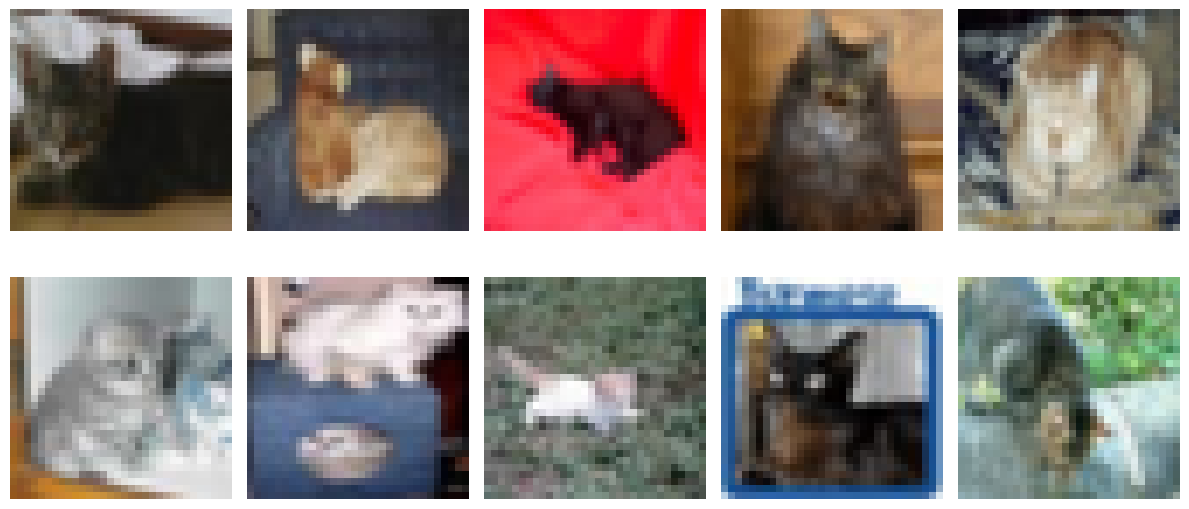

In [ ]:
import matplotlib.pyplot as plt

def show_images(images, num_images=10):
    plt.figure(figsize=(12, 6))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_images(normal_data_cat)


In [ ]:
# Preprocess data (normalize pixel values)
normal_data_cat= normal_data_cat.astype('float32') / 255.0

In [ ]:
np.where(y_train != 3)

(array([    0,     1,     2, ..., 49997, 49998, 49999]),
 array([0, 0, 0, ..., 0, 0, 0]))

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
np.where(y_train != 3)[0]

array([    0,     1,     2, ..., 49997, 49998, 49999])

In [ ]:
anomalous_data_cat = x_train[np.where(y_train != 3)[0]]

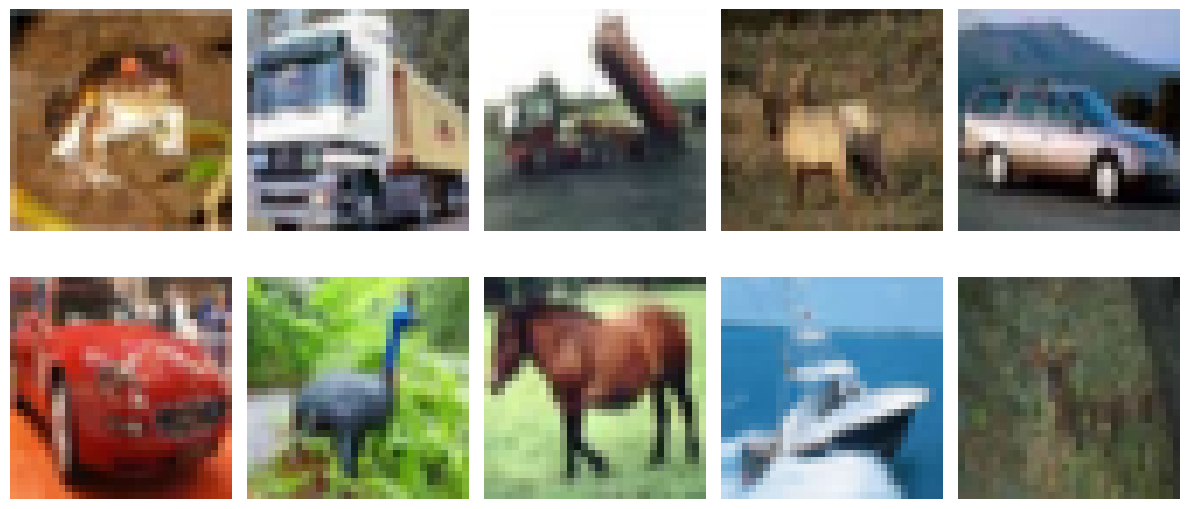

In [ ]:
show_images(anomalous_data_cat)

**Model trained on normal data(Cat)**

In [ ]:
model_plane.compile(optimizer='adam', loss='mse')
model_plane.fit(normal_data_cat, normal_data_cat, epochs=10, batch_size=32)

Epoch 1/10
157/157 [==============================] - 276s 2s/step - loss: 0.0245
Epoch 2/10
157/157 [==============================] - 283s 2s/step - loss: 0.0089
Epoch 3/10
157/157 [==============================] - 286s 2s/step - loss: 0.0067
Epoch 4/10
157/157 [==============================] - 312s 2s/step - loss: 0.0056
Epoch 5/10
157/157 [==============================] - 286s 2s/step - loss: 0.0049
Epoch 6/10
157/157 [==============================] - 269s 2s/step - loss: 0.0045
Epoch 7/10
157/157 [==============================] - 268s 2s/step - loss: 0.0043
Epoch 8/10
157/157 [==============================] - 258s 2s/step - loss: 0.0038
Epoch 9/10
157/157 [==============================] - 267s 2s/step - loss: 0.0036
Epoch 10/10
157/157 [==============================] - 254s 2s/step - loss: 0.0035


In [ ]:
normal_reconstructions = model_plane.predict(normal_data_cat)
anomalous_reconstructions = model_plane.predict(anomalous_data_cat)

normal_errors = tf.keras.losses.mean_squared_error(normal_data_cat, normal_reconstructions)
anomalous_errors = tf.keras.losses.mean_squared_error(anomalous_data_cat, anomalous_reconstructions)

threshold = np.mean(normal_errors) + 3 * np.std(normal_errors)

normal_predictions = normal_errors < threshold
anomalous_predictions = anomalous_errors >= threshold



1407/1407 [==============================] - 235s 167ms/step


In [ ]:
print(threshold)

0.020853800466284156


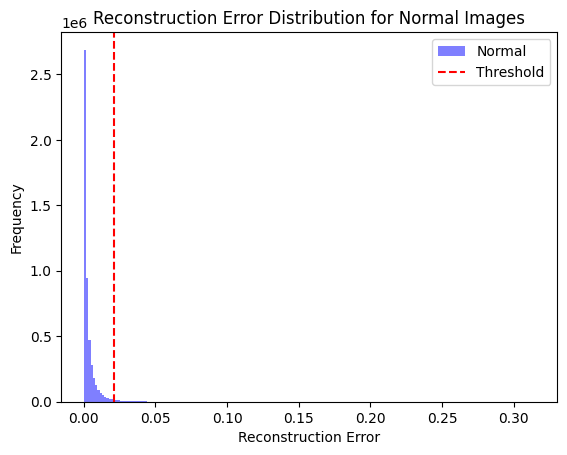

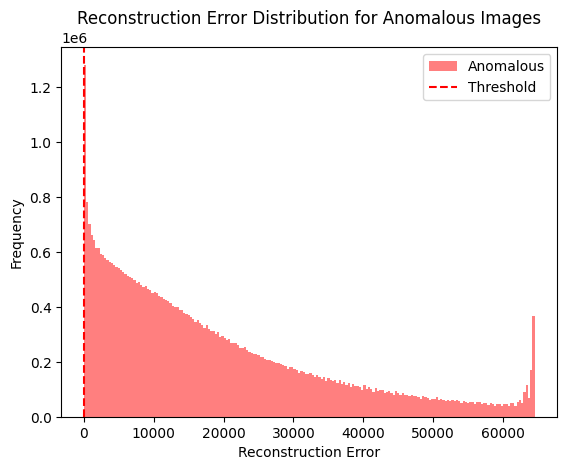

In [ ]:
normal_errors_flat = normal_errors.numpy().flatten()
# Visualize reconstruction errors for normal data
plt.hist(normal_errors_flat, bins=200, color='blue', alpha=0.5, label='Normal')
plt.axvline(x=threshold, color='r', linestyle='--', label='Threshold')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Reconstruction Error Distribution for Normal Images')
plt.legend()
plt.show()

# Visualize reconstruction errors for anomalous data
anomalous_errors_flat = anomalous_errors.numpy().flatten()
plt.hist(anomalous_errors_flat, bins=200, color='red', alpha=0.5, label='Anomalous')
plt.axvline(x=threshold, color='r', linestyle='--', label='Threshold')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Reconstruction Error Distribution for Anomalous Images')
plt.legend()
plt.show()

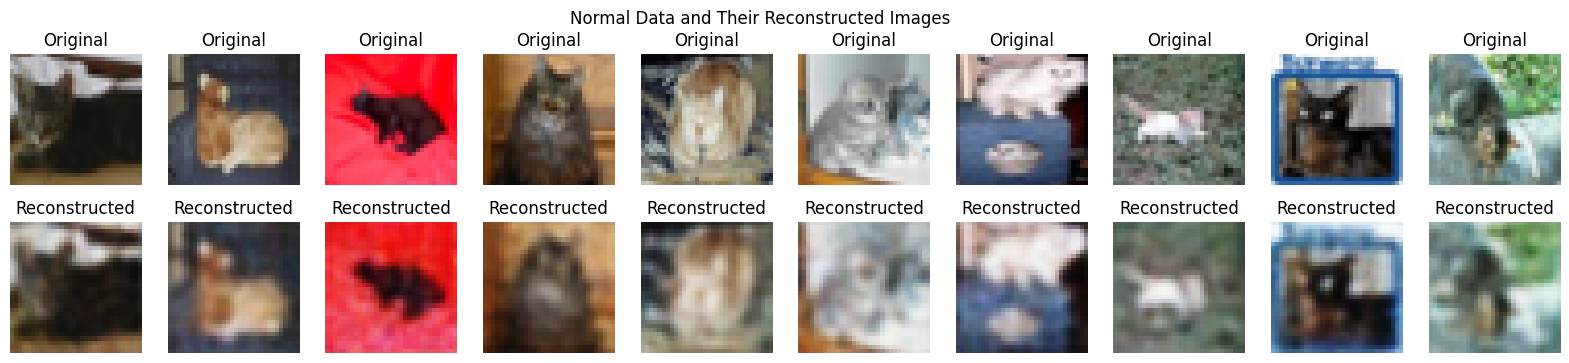

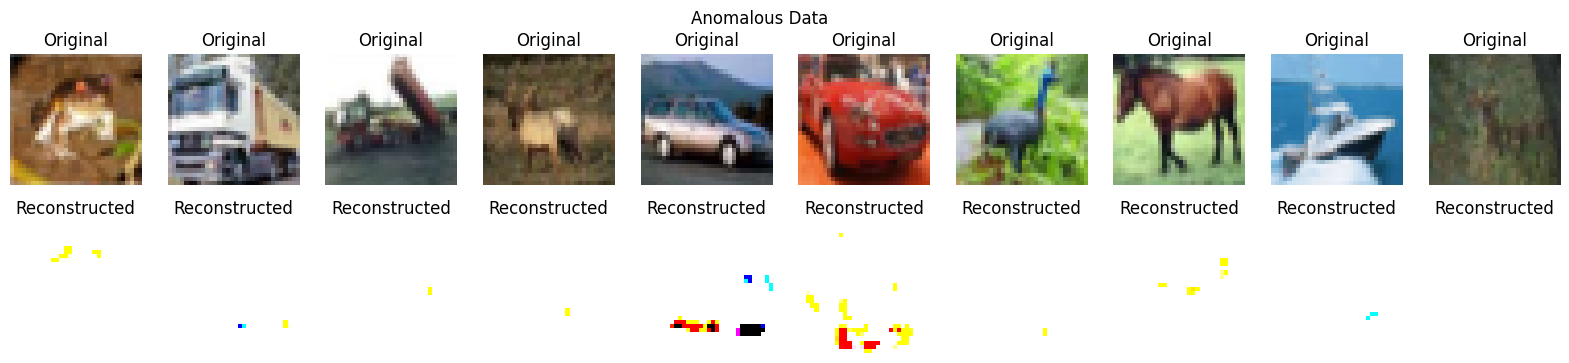

In [ ]:
import matplotlib.pyplot as plt

def plot_images(original_images, reconstructed_images, title):
    plt.figure(figsize=(20, 4))
    for i in range(10):
        # Original images
        plt.subplot(2, 10, i + 1)
        plt.imshow(original_images[i])
        plt.title('Original')
        plt.axis('off')

        # Reconstructed images
        plt.subplot(2, 10, i + 11)
        plt.imshow(reconstructed_images[i])
        plt.title('Reconstructed')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()
plot_images(normal_data_cat[:10], normal_reconstructions[:10], 'Normal Data and Their Reconstructed Images')

plot_images(anomalous_data_cat[:10], anomalous_reconstructions[:10], 'Anomalous Data')

In [ ]:
from sklearn.metrics import roc_auc_score

# Convert TensorFlow tensors to NumPy arrays
normal_predictions_np = normal_predictions.numpy().ravel()
anomalous_predictions_np = anomalous_predictions.numpy().ravel()

# Combine normal and anomalous predictions and errors
all_predictions = np.concatenate([normal_predictions_np, anomalous_predictions_np])
all_errors = np.concatenate([normal_errors.numpy().ravel(), anomalous_errors.numpy().ravel()])

# Create labels: 0 for normal (negative class), 1 for anomalous (positive class)
true_labels = np.concatenate([np.zeros_like(normal_predictions_np), np.ones_like(anomalous_predictions_np)])

# Calculate AUC
auc_score = roc_auc_score(true_labels, all_errors)

print("AUC Score:", auc_score)


AUC Score: 0.9993816263183656


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define transformations
datagen = ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.125,
    height_shift_range=0.125,
    zoom_range=[0.8, 1.2],
)

# Create generator for normal data
normal_generator = datagen.flow(normal_data_cat, shuffle=False, batch_size=normal_data_cat.shape[0])

# Create generator for anomalous data
anomalous_generator = datagen.flow(anomalous_data_cat, shuffle=False, batch_size=anomalous_data_cat.shape[0])

# Generate augmented images
normal_augmented_data = normal_generator.next()
anomalous_augmented_data = anomalous_generator.next()
anomalous_augmented_data = anomalous_augmented_data/ 255.0

In [ ]:
# Predict on augmented normal data
normal_augmented_reconstructions = model_plane.predict(normal_augmented_data)

# Predict on augmented anomalous data
anomalous_augmented_reconstructions = model_plane.predict(anomalous_augmented_data)


1407/1407 [==============================] - 227s 161ms/step


In [ ]:
normal_aug_errors = tf.keras.losses.mean_squared_error(normal_augmented_data, normal_augmented_reconstructions)
anomalous_aug_errors = tf.keras.losses.mean_squared_error(anomalous_augmented_data, anomalous_augmented_reconstructions)

threshold_aug = np.mean(normal_aug_errors) + 3 * np.std(normal_aug_errors)
print(threshold_aug)

normal_aug_predictions = normal_aug_errors < threshold_aug
anomalous_aug_predictions = anomalous_aug_errors >= threshold_aug

0.02026191307231784


In [ ]:
from sklearn.metrics import roc_auc_score

# Convert TensorFlow tensors to NumPy arrays
normal_aug_predictions_np = normal_aug_predictions.numpy().ravel()
anomalous_aug_predictions_np = anomalous_aug_predictions.numpy().ravel()

# Combine normal and anomalous predictions and errors
all_predictions = np.concatenate([normal_aug_predictions_np, anomalous_aug_predictions_np])
all_errors = np.concatenate([normal_aug_errors.numpy().ravel(), anomalous_aug_errors.numpy().ravel()])

# Create labels: 0 for normal (negative class), 1 for anomalous (positive class)
true_labels = np.concatenate([np.zeros_like(normal_aug_predictions_np), np.ones_like(anomalous_aug_predictions_np)])

# Calculate AUC
auc_score = roc_auc_score(true_labels, all_errors)

print("AUC Score:", auc_score)

AUC Score: 0.5279930727976249


# Preprocessing the data -Deer

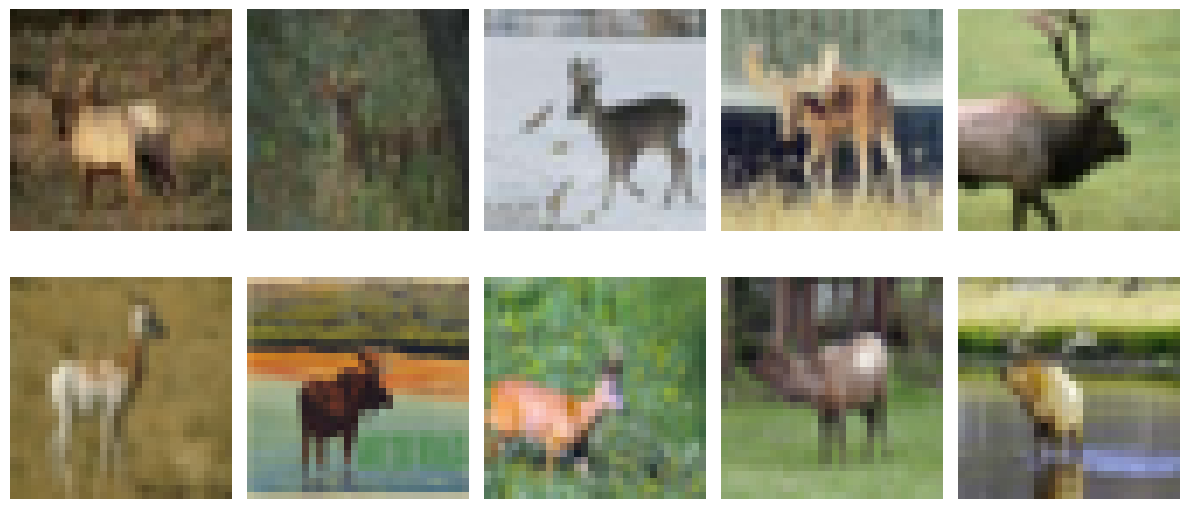

In [ ]:
normal_data= x_train[np.where(y_train == 4)[0]]
show_images(normal_data)

# Preprocess data (normalize pixel values)
normal_data= normal_data.astype('float32') / 255.0

anomalous_data= x_train[np.where(y_train != 4)[0]]

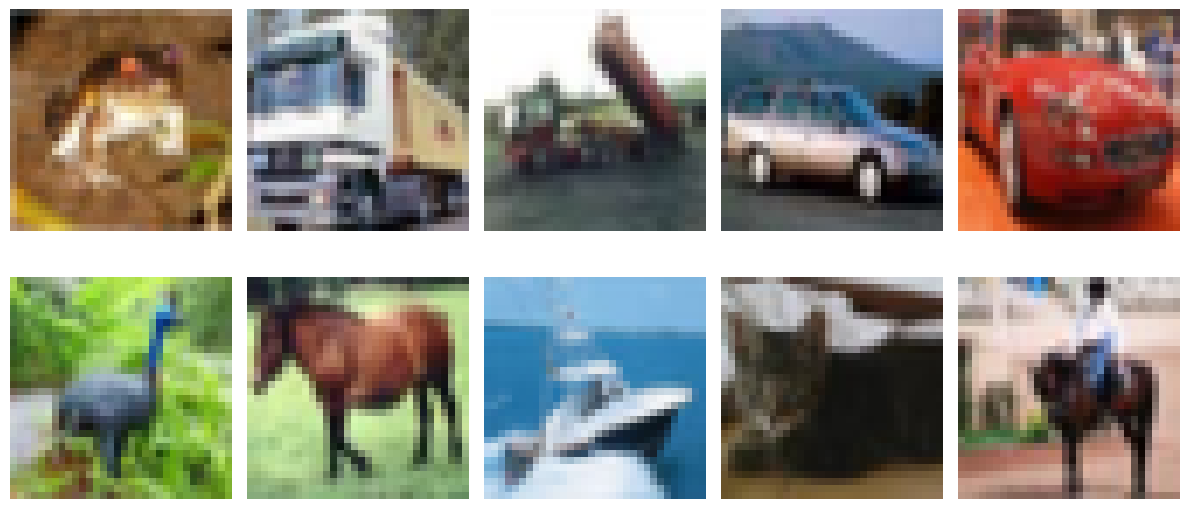

In [ ]:
show_images(anomalous_data)

**Model trained on Deer**

In [ ]:
model_plane.compile(optimizer='adam', loss='mse')
model_plane.fit(normal_data, normal_data, epochs=10, batch_size=32)

Epoch 1/10
157/157 [==============================] - 264s 2s/step - loss: 0.0056
Epoch 2/10
157/157 [==============================] - 246s 2s/step - loss: 0.0035
Epoch 3/10
157/157 [==============================] - 259s 2s/step - loss: 0.0032
Epoch 4/10
157/157 [==============================] - 260s 2s/step - loss: 0.0030
Epoch 5/10
157/157 [==============================] - 257s 2s/step - loss: 0.0029
Epoch 6/10
157/157 [==============================] - 257s 2s/step - loss: 0.0027
Epoch 7/10
157/157 [==============================] - 258s 2s/step - loss: 0.0026
Epoch 8/10
157/157 [==============================] - 258s 2s/step - loss: 0.0025
Epoch 9/10
157/157 [==============================] - 266s 2s/step - loss: 0.0023
Epoch 10/10
157/157 [==============================] - 256s 2s/step - loss: 0.0022


In [ ]:
normal_reconstructions = model_plane.predict(normal_data)
anomalous_reconstructions = model_plane.predict(anomalous_data)

normal_errors = tf.keras.losses.mean_squared_error(normal_data, normal_reconstructions)
anomalous_errors = tf.keras.losses.mean_squared_error(anomalous_data, anomalous_reconstructions)

threshold = np.mean(normal_errors) + 3 * np.std(normal_errors)

normal_predictions = normal_errors < threshold
anomalous_predictions = anomalous_errors >= threshold



1407/1407 [==============================] - 227s 161ms/step


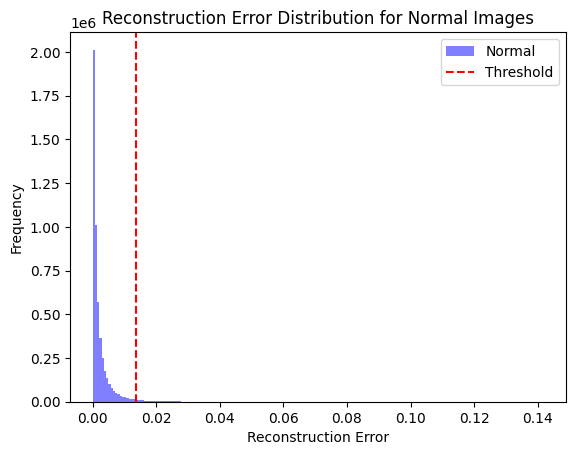

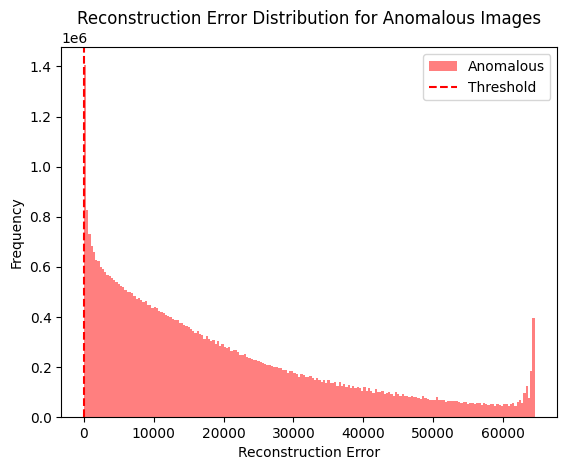

In [ ]:
normal_errors_flat = normal_errors.numpy().flatten()
# Visualize reconstruction errors for normal data
plt.hist(normal_errors_flat, bins=200, color='blue', alpha=0.5, label='Normal')
plt.axvline(x=threshold, color='r', linestyle='--', label='Threshold')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Reconstruction Error Distribution for Normal Images')
plt.legend()
plt.show()

# Visualize reconstruction errors for anomalous data
anomalous_errors_flat = anomalous_errors.numpy().flatten()
plt.hist(anomalous_errors_flat, bins=200, color='red', alpha=0.5, label='Anomalous')
plt.axvline(x=threshold, color='r', linestyle='--', label='Threshold')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Reconstruction Error Distribution for Anomalous Images')
plt.legend()
plt.show()

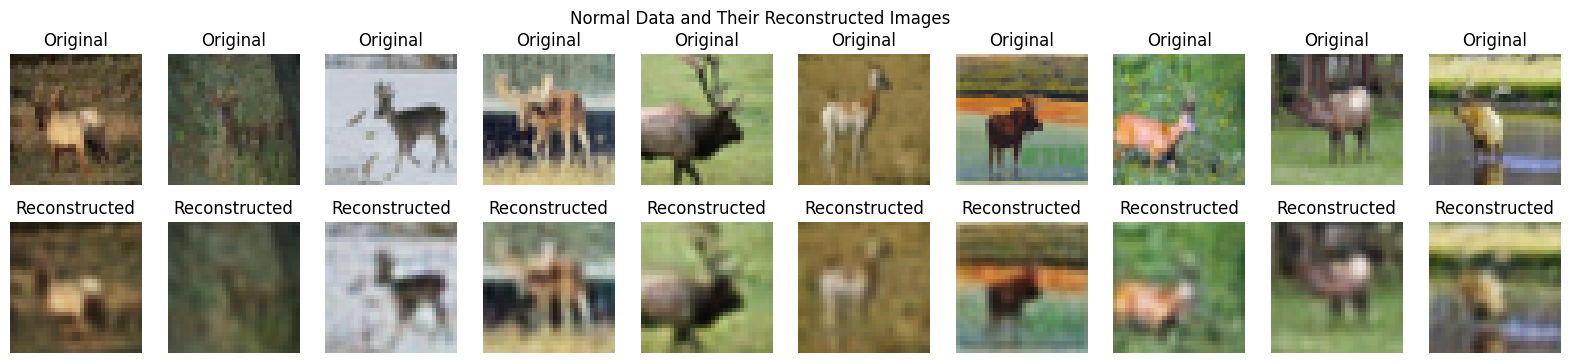

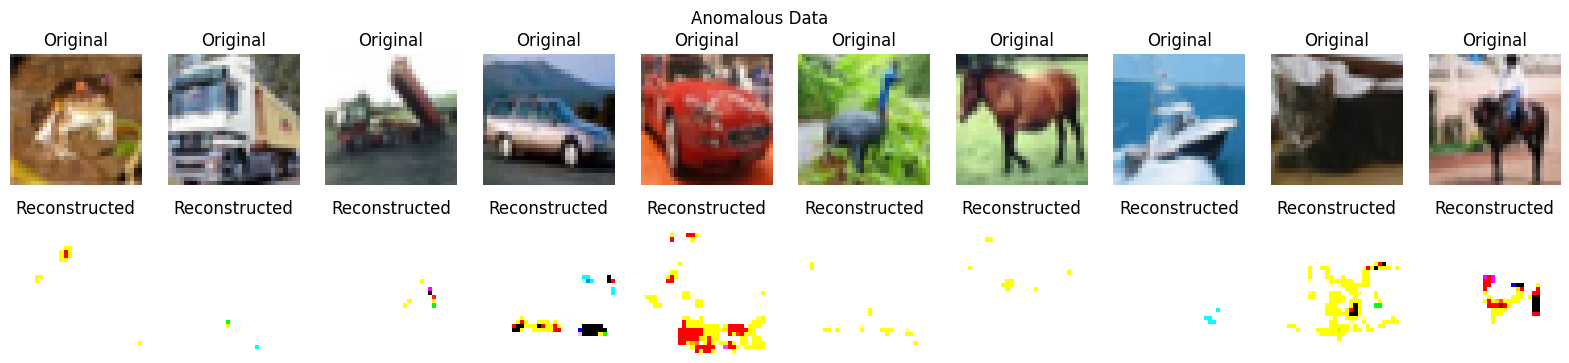

In [ ]:
plot_images(normal_data[:10], normal_reconstructions[:10], 'Normal Data and Their Reconstructed Images')

plot_images(anomalous_data[:10], anomalous_reconstructions[:10], 'Anomalous Data')

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define transformations
datagen = ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.125,
    height_shift_range=0.125,
    zoom_range=[0.8, 1.2],
)

# Create generator for normal data
normal_generator = datagen.flow(normal_data, shuffle=False, batch_size=normal_data.shape[0])

# Create generator for anomalous data
anomalous_generator = datagen.flow(anomalous_data, shuffle=False, batch_size=anomalous_data.shape[0])

# Generate augmented images
normal_augmented_data = normal_generator.next()
anomalous_augmented_data = anomalous_generator.next()
anomalous_augmented_data = anomalous_augmented_data/ 255.0

In [ ]:
# Predict on augmented normal data
normal_augmented_reconstructions = model_plane.predict(normal_augmented_data)

# Predict on augmented anomalous data
anomalous_augmented_reconstructions = model_plane.predict(anomalous_augmented_data)

normal_aug_errors = tf.keras.losses.mean_squared_error(normal_augmented_data, normal_augmented_reconstructions)
anomalous_aug_errors = tf.keras.losses.mean_squared_error(anomalous_augmented_data, anomalous_augmented_reconstructions)

threshold_aug = np.mean(normal_aug_errors) + 3 * np.std(normal_aug_errors)
print(threshold_aug)

normal_aug_predictions = normal_aug_errors < threshold_aug
anomalous_aug_predictions = anomalous_aug_errors >= threshold_aug

1407/1407 [==============================] - 206s 146ms/step
0.20130303129553795


In [ ]:
from sklearn.metrics import roc_auc_score

# Convert TensorFlow tensors to NumPy arrays
normal_aug_predictions_np = normal_aug_predictions.numpy().ravel()
anomalous_aug_predictions_np = anomalous_aug_predictions.numpy().ravel()

# Combine normal and anomalous predictions and errors
all_predictions = np.concatenate([normal_aug_predictions_np, anomalous_aug_predictions_np])
all_errors = np.concatenate([normal_aug_errors.numpy().ravel(), anomalous_aug_errors.numpy().ravel()])

# Create labels: 0 for normal (negative class), 1 for anomalous (positive class)
true_labels = np.concatenate([np.zeros_like(normal_aug_predictions_np), np.ones_like(anomalous_aug_predictions_np)])

# Calculate AUC
auc_score = roc_auc_score(true_labels, all_errors)

print("AUC Score:", auc_score)

AUC Score: 0.5539941930128732


# Preprocessing the data-Dog

In [ ]:
normal_data= x_train[np.where(y_train == 5)[0]]
show_images(normal_data_cat)

# Preprocess data (normalize pixel values)
normal_data= normal_data.astype('float32') / 255.0

anomalous_data= x_train[np.where(y_train != 5)[0]]

NameError: name 'normal_data_cat' is not defined

In [ ]:
show_images(anomalous_data)

**Model trained on Dog**

In [ ]:
model_plane.compile(optimizer='adam', loss='mse')
model_plane.fit(normal_data, normal_data, epochs=10, batch_size=32)

In [ ]:
normal_reconstructions = model_plane.predict(normal_data)
anomalous_reconstructions = model_plane.predict(anomalous_data)

normal_errors = tf.keras.losses.mean_squared_error(normal_data, normal_reconstructions)
anomalous_errors = tf.keras.losses.mean_squared_error(anomalous_data, anomalous_reconstructions)

threshold = np.mean(normal_errors) + 3 * np.std(normal_errors)

normal_predictions = normal_errors < threshold
anomalous_predictions = anomalous_errors >= threshold

In [ ]:
normal_errors_flat = normal_errors.numpy().flatten()
# Visualize reconstruction errors for normal data
plt.hist(normal_errors_flat, bins=200, color='blue', alpha=0.5, label='Normal')
plt.axvline(x=threshold, color='r', linestyle='--', label='Threshold')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Reconstruction Error Distribution for Normal Images')
plt.legend()
plt.show()

# Visualize reconstruction errors for anomalous data
anomalous_errors_flat = anomalous_errors.numpy().flatten()
plt.hist(anomalous_errors_flat, bins=200, color='red', alpha=0.5, label='Anomalous')
plt.axvline(x=threshold, color='r', linestyle='--', label='Threshold')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Reconstruction Error Distribution for Anomalous Images')
plt.legend()
plt.show()

In [ ]:
plot_images(normal_data[:10], normal_reconstructions[:10], 'Normal Data and Their Reconstructed Images')

plot_images(anomalous_data[:10], anomalous_reconstructions[:10], 'Anomalous Data')

# Preprocessing the Data-Truck

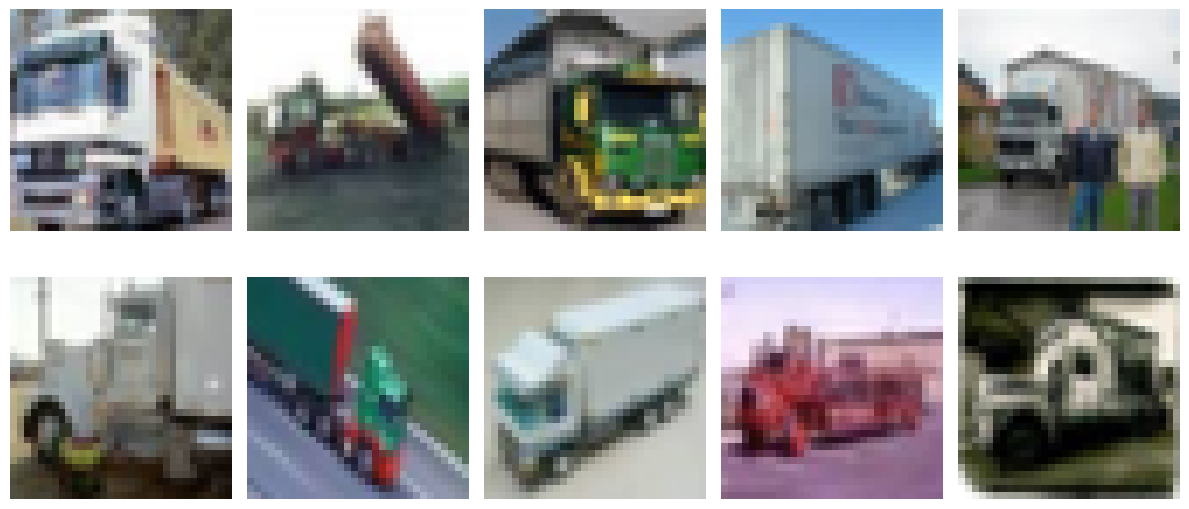

In [ ]:
normal_data= x_train[np.where(y_train == 9)[0]]
show_images(normal_data)

# Preprocess data (normalize pixel values)
normal_data= normal_data.astype('float32') / 255.0

anomalous_data= x_train[np.where(y_train != 9)[0]]

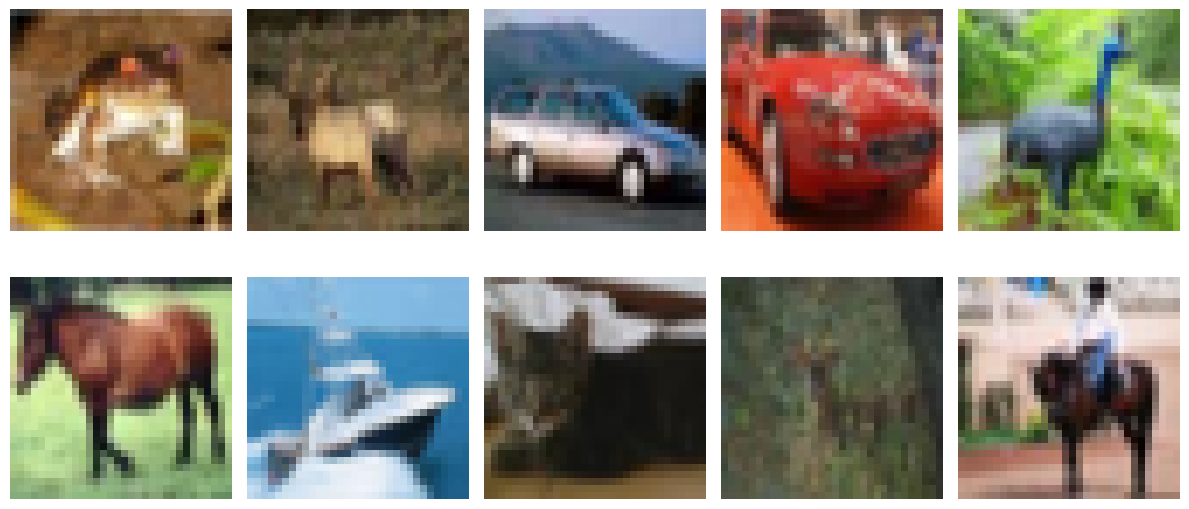

In [ ]:
show_images(anomalous_data)

**Model trained on truck**

In [ ]:
model_plane.compile(optimizer='adam', loss='mse')
model_plane.fit(normal_data, normal_data, epochs=10, batch_size=32)

Epoch 1/10
157/157 [==============================] - 283s 2s/step - loss: 0.0292
Epoch 2/10
157/157 [==============================] - 316s 2s/step - loss: 0.0114
Epoch 3/10
157/157 [==============================] - 276s 2s/step - loss: 0.0088
Epoch 4/10
157/157 [==============================] - 281s 2s/step - loss: 0.0075
Epoch 5/10
157/157 [==============================] - 277s 2s/step - loss: 0.0067
Epoch 6/10
157/157 [==============================] - 278s 2s/step - loss: 0.0061
Epoch 7/10
157/157 [==============================] - 273s 2s/step - loss: 0.0056
Epoch 8/10
157/157 [==============================] - 267s 2s/step - loss: 0.0052
Epoch 9/10
157/157 [==============================] - 270s 2s/step - loss: 0.0048
Epoch 10/10
157/157 [==============================] - 269s 2s/step - loss: 0.0045


In [ ]:
normal_reconstructions = model_plane.predict(normal_data)
anomalous_reconstructions = model_plane.predict(anomalous_data)

normal_errors = tf.keras.losses.mean_squared_error(normal_data, normal_reconstructions)
anomalous_errors = tf.keras.losses.mean_squared_error(anomalous_data, anomalous_reconstructions)

threshold = np.mean(normal_errors) + 3 * np.std(normal_errors)

normal_predictions = normal_errors < threshold
anomalous_predictions = anomalous_errors >= threshold


1407/1407 [==============================] - 232s 164ms/step


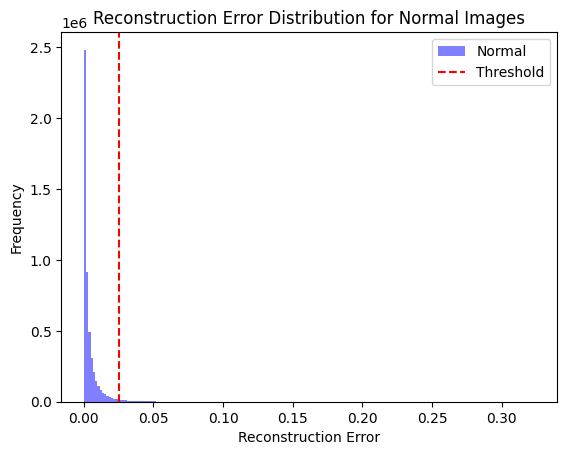

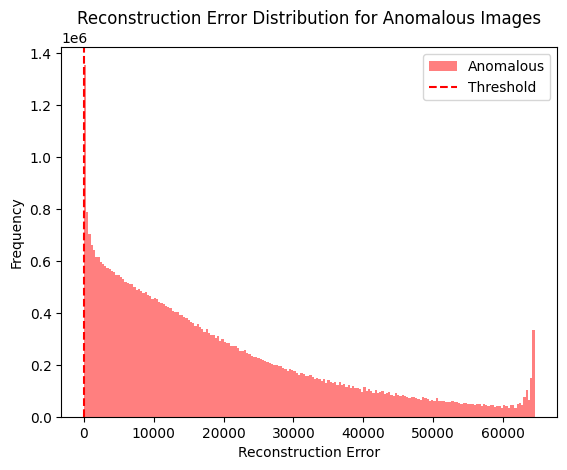

In [ ]:
normal_errors_flat = normal_errors.numpy().flatten()
# Visualize reconstruction errors for normal data
plt.hist(normal_errors_flat, bins=200, color='blue', alpha=0.5, label='Normal')
plt.axvline(x=threshold, color='r', linestyle='--', label='Threshold')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Reconstruction Error Distribution for Normal Images')
plt.legend()
plt.show()

# Visualize reconstruction errors for anomalous data
anomalous_errors_flat = anomalous_errors.numpy().flatten()
plt.hist(anomalous_errors_flat, bins=200, color='red', alpha=0.5, label='Anomalous')
plt.axvline(x=threshold, color='r', linestyle='--', label='Threshold')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Reconstruction Error Distribution for Anomalous Images')
plt.legend()
plt.show()

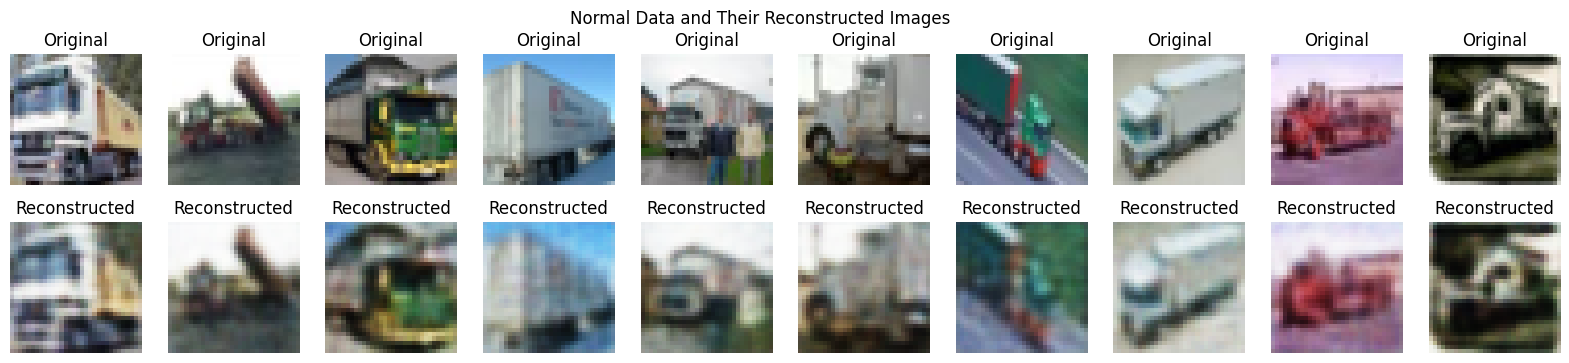

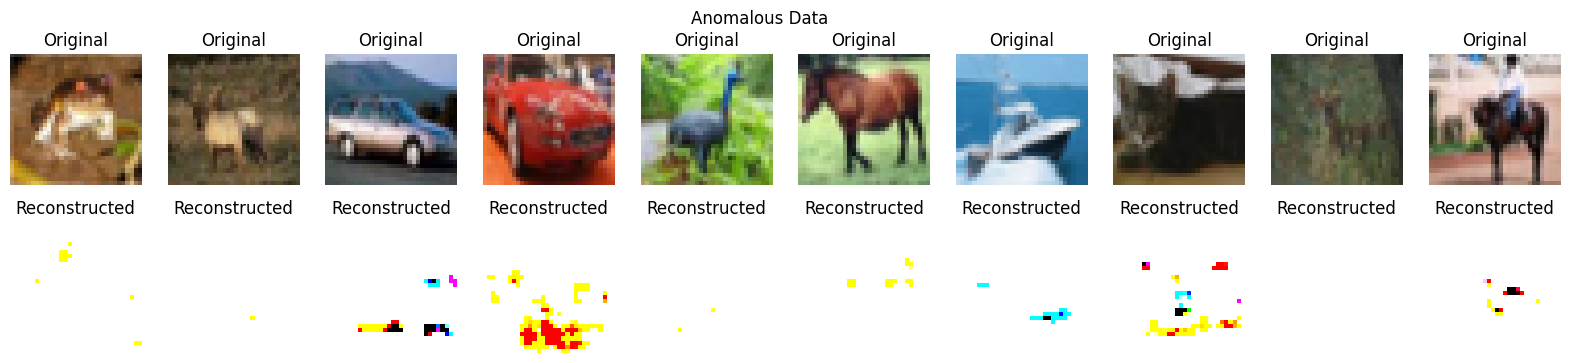

In [ ]:
import matplotlib.pyplot as plt

def plot_images(original_images, reconstructed_images, title):
    plt.figure(figsize=(20, 4))
    for i in range(10):
        # Original images
        plt.subplot(2, 10, i + 1)
        plt.imshow(original_images[i])
        plt.title('Original')
        plt.axis('off')

        # Reconstructed images
        plt.subplot(2, 10, i + 11)
        plt.imshow(reconstructed_images[i])
        plt.title('Reconstructed')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()
plot_images(normal_data[:10], normal_reconstructions[:10], 'Normal Data and Their Reconstructed Images')

plot_images(anomalous_data[:10], anomalous_reconstructions[:10], 'Anomalous Data')

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define transformations
datagen = ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.125,
    height_shift_range=0.125,
    zoom_range=[0.8, 1.2],
)

# Create generator for normal data
normal_generator = datagen.flow(normal_data, shuffle=False, batch_size=normal_data.shape[0])

# Create generator for anomalous data
anomalous_generator = datagen.flow(anomalous_data, shuffle=False, batch_size=anomalous_data.shape[0])

# Generate augmented images
normal_augmented_data = normal_generator.next()
anomalous_augmented_data = anomalous_generator.next()
anomalous_augmented_data = anomalous_augmented_data/ 255.0

In [ ]:
# Predict on augmented normal data
normal_augmented_reconstructions = model_plane.predict(normal_augmented_data)

# Predict on augmented anomalous data
anomalous_augmented_reconstructions = model_plane.predict(anomalous_augmented_data)

normal_aug_errors = tf.keras.losses.mean_squared_error(normal_augmented_data, normal_augmented_reconstructions)
anomalous_aug_errors = tf.keras.losses.mean_squared_error(anomalous_augmented_data, anomalous_augmented_reconstructions)

threshold_aug = np.mean(normal_aug_errors) + 3 * np.std(normal_aug_errors)
print(threshold_aug)

normal_aug_predictions = normal_aug_errors < threshold_aug
anomalous_aug_predictions = anomalous_aug_errors >= threshold_aug

1407/1407 [==============================] - 203s 144ms/step
0.27389778196811676


In [ ]:
from sklearn.metrics import roc_auc_score

# Convert TensorFlow tensors to NumPy arrays
normal_aug_predictions_np = normal_aug_predictions.numpy().ravel()
anomalous_aug_predictions_np = anomalous_aug_predictions.numpy().ravel()

# Combine normal and anomalous predictions and errors
all_predictions = np.concatenate([normal_aug_predictions_np, anomalous_aug_predictions_np])
all_errors = np.concatenate([normal_aug_errors.numpy().ravel(), anomalous_aug_errors.numpy().ravel()])

# Create labels: 0 for normal (negative class), 1 for anomalous (positive class)
true_labels = np.concatenate([np.zeros_like(normal_aug_predictions_np), np.ones_like(anomalous_aug_predictions_np)])

# Calculate AUC
auc_score = roc_auc_score(true_labels, all_errors)

print("AUC Score:", auc_score)

AUC Score: 0.4613818700039252


# Preprocessing the data-Ship

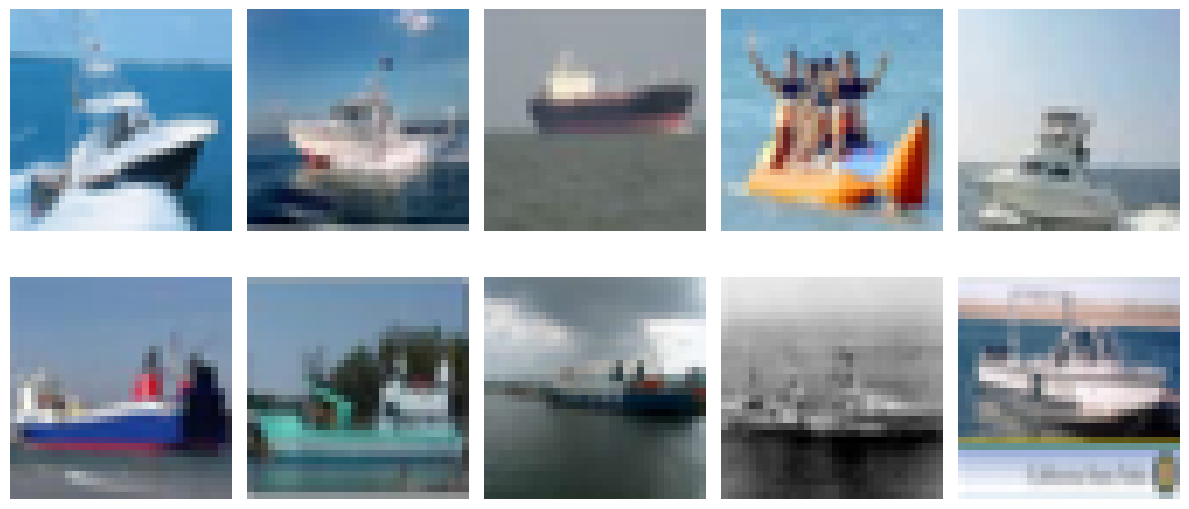

In [ ]:
normal_data= x_train[np.where(y_train == 8)[0]]
show_images(normal_data)

# Preprocess data (normalize pixel values)
normal_data= normal_data.astype('float32') / 255.0

anomalous_data= x_train[np.where(y_train != 8)[0]]

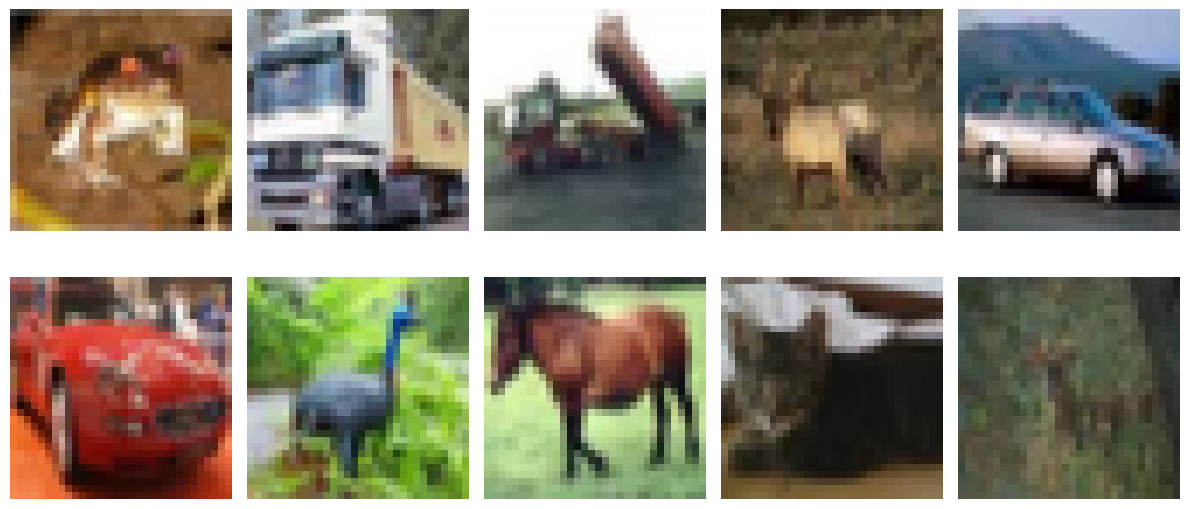

In [ ]:
show_images(anomalous_data)

**Model trained on ship**

In [ ]:
model_plane.compile(optimizer='adam', loss='mse')
model_plane.fit(normal_data, normal_data, epochs=10, batch_size=32)

In [ ]:
normal_errors_flat = normal_errors.numpy().flatten()
# Visualize reconstruction errors for normal data
plt.hist(normal_errors_flat, bins=200, color='blue', alpha=0.5, label='Normal')
plt.axvline(x=threshold, color='r', linestyle='--', label='Threshold')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Reconstruction Error Distribution for Normal Images')
plt.legend()
plt.show()

# Visualize reconstruction errors for anomalous data
anomalous_errors_flat = anomalous_errors.numpy().flatten()
plt.hist(anomalous_errors_flat, bins=200, color='red', alpha=0.5, label='Anomalous')
plt.axvline(x=threshold, color='r', linestyle='--', label='Threshold')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Reconstruction Error Distribution for Anomalous Images')
plt.legend()
plt.show()

In [ ]:
plot_images(normal_data[:10], normal_reconstructions[:10], 'Normal Data and Their Reconstructed Images')

plot_images(anomalous_data[:10], anomalous_reconstructions[:10], 'Anomalous Data')

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define transformations
datagen = ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.125,
    height_shift_range=0.125,
    zoom_range=[0.8, 1.2],
)

# Create generator for normal data
normal_generator = datagen.flow(normal_data, shuffle=False, batch_size=normal_data.shape[0])

# Create generator for anomalous data
anomalous_generator = datagen.flow(anomalous_data, shuffle=False, batch_size=anomalous_data.shape[0])

# Generate augmented images
normal_augmented_data = normal_generator.next()
anomalous_augmented_data = anomalous_generator.next()
anomalous_augmented_data = anomalous_augmented_data/ 255.0

In [ ]:
# Predict on augmented normal data
normal_augmented_reconstructions = model_plane.predict(normal_augmented_data)

# Predict on augmented anomalous data
anomalous_augmented_reconstructions = model_plane.predict(anomalous_augmented_data)

normal_aug_errors = tf.keras.losses.mean_squared_error(normal_augmented_data, normal_augmented_reconstructions)
anomalous_aug_errors = tf.keras.losses.mean_squared_error(anomalous_augmented_data, anomalous_augmented_reconstructions)

threshold_aug = np.mean(normal_aug_errors) + 3 * np.std(normal_aug_errors)
print(threshold_aug)

normal_aug_predictions = normal_aug_errors < threshold_aug
anomalous_aug_predictions = anomalous_aug_errors >= threshold_aug

1407/1407 [==============================] - 205s 146ms/step
0.23765476420521736


In [ ]:
from sklearn.metrics import roc_auc_score

# Convert TensorFlow tensors to NumPy arrays
normal_aug_predictions_np = normal_aug_predictions.numpy().ravel()
anomalous_aug_predictions_np = anomalous_aug_predictions.numpy().ravel()

# Combine normal and anomalous predictions and errors
all_predictions = np.concatenate([normal_aug_predictions_np, anomalous_aug_predictions_np])
all_errors = np.concatenate([normal_aug_errors.numpy().ravel(), anomalous_aug_errors.numpy().ravel()])

# Create labels: 0 for normal (negative class), 1 for anomalous (positive class)
true_labels = np.concatenate([np.zeros_like(normal_aug_predictions_np), np.ones_like(anomalous_aug_predictions_np)])

# Calculate AUC
auc_score = roc_auc_score(true_labels, all_errors)

print("AUC Score:", auc_score)

AUC Score: 0.5118327433089871


# Preprocessing the data-Horse

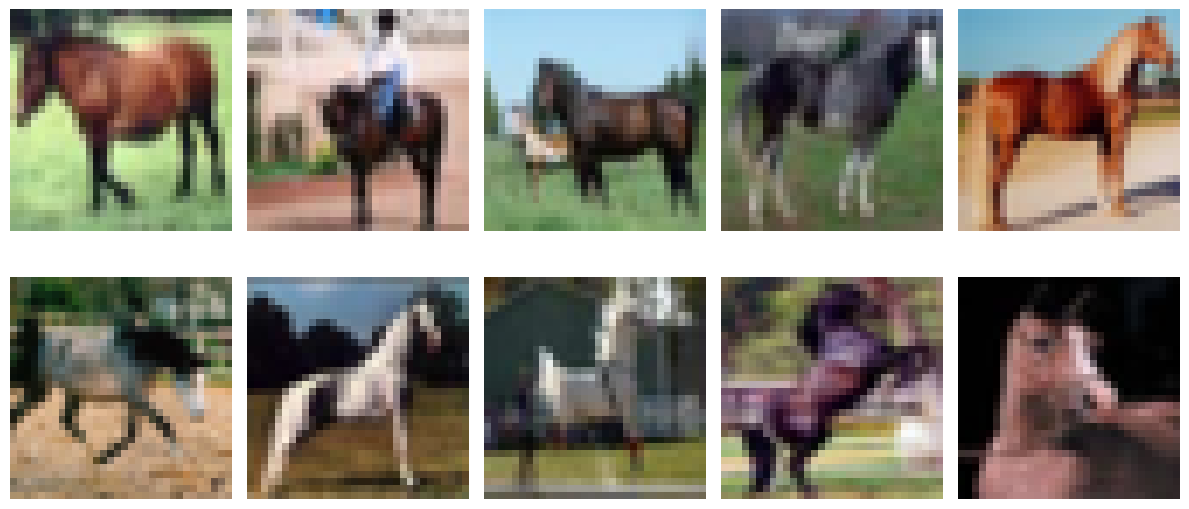

In [ ]:
normal_data= x_train[np.where(y_train == 7)[0]]
show_images(normal_data)

# Preprocess data (normalize pixel values)
normal_data= normal_data.astype('float32') / 255.0

anomalous_data= x_train[np.where(y_train != 7)[0]]

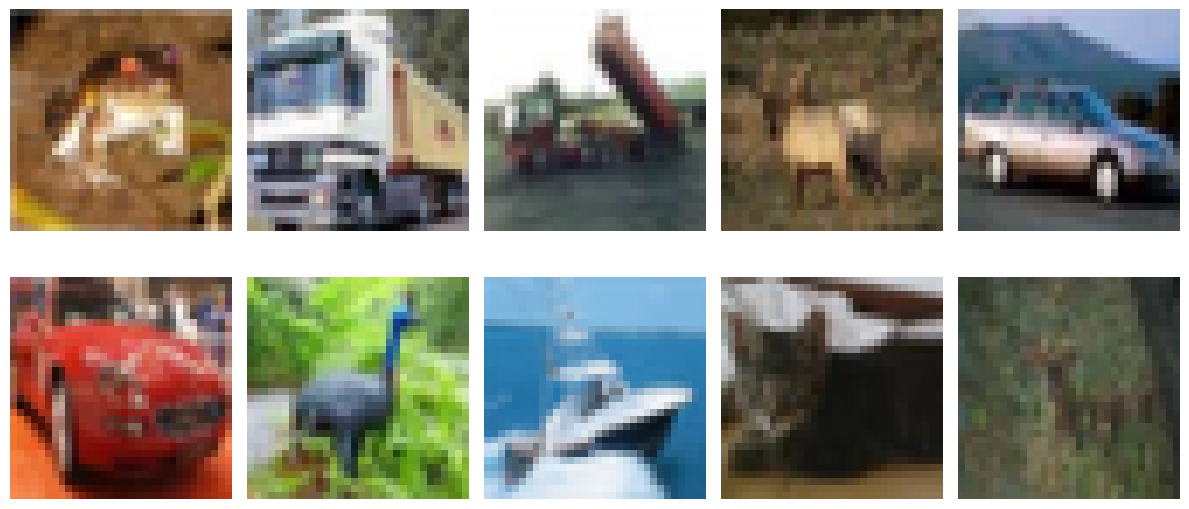

In [ ]:
show_images(anomalous_data)

In [ ]:
model_plane.compile(optimizer='adam', loss='mse')
model_plane.fit(normal_data, normal_data, epochs=10, batch_size=32)

Epoch 1/10
157/157 [==============================] - 267s 2s/step - loss: 0.0253
Epoch 2/10
157/157 [==============================] - 235s 1s/step - loss: 0.0100
Epoch 3/10
157/157 [==============================] - 234s 1s/step - loss: 0.0075
Epoch 4/10
157/157 [==============================] - 251s 2s/step - loss: 0.0064
Epoch 5/10
157/157 [==============================] - 238s 2s/step - loss: 0.0057
Epoch 6/10
157/157 [==============================] - 251s 2s/step - loss: 0.0052
Epoch 7/10
157/157 [==============================] - 248s 2s/step - loss: 0.0047
Epoch 8/10
157/157 [==============================] - 248s 2s/step - loss: 0.0044
Epoch 9/10
157/157 [==============================] - 255s 2s/step - loss: 0.0041
Epoch 10/10
157/157 [==============================] - 237s 2s/step - loss: 0.0039


In [ ]:
normal_reconstructions = model_plane.predict(normal_data)
anomalous_reconstructions = model_plane.predict(anomalous_data)

normal_errors = tf.keras.losses.mean_squared_error(normal_data, normal_reconstructions)
anomalous_errors = tf.keras.losses.mean_squared_error(anomalous_data, anomalous_reconstructions)

threshold = np.mean(normal_errors) + 3 * np.std(normal_errors)

normal_predictions = normal_errors < threshold
anomalous_predictions = anomalous_errors >= threshold

1407/1407 [==============================] - 213s 151ms/step


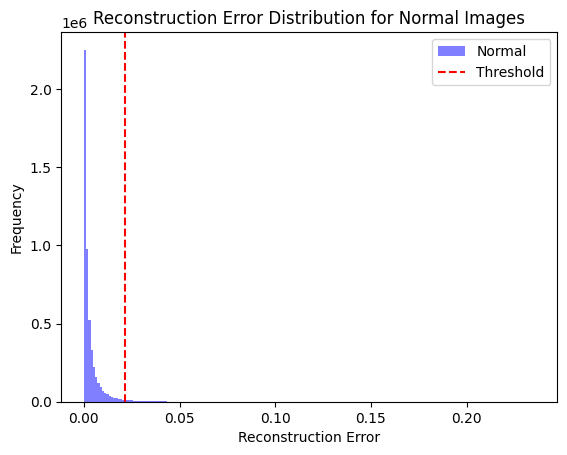

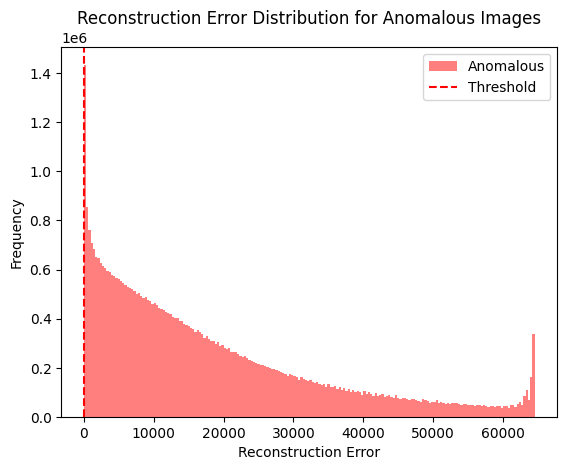

In [ ]:
 normal_errors_flat = normal_errors.numpy().flatten()
# Visualize reconstruction errors for normal data
plt.hist(normal_errors_flat, bins=200, color='blue', alpha=0.5, label='Normal')
plt.axvline(x=threshold, color='r', linestyle='--', label='Threshold')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Reconstruction Error Distribution for Normal Images')
plt.legend()
plt.show()

# Visualize reconstruction errors for anomalous data
anomalous_errors_flat = anomalous_errors.numpy().flatten()
plt.hist(anomalous_errors_flat, bins=200, color='red', alpha=0.5, label='Anomalous')
plt.axvline(x=threshold, color='r', linestyle='--', label='Threshold')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Reconstruction Error Distribution for Anomalous Images')
plt.legend()
plt.show()

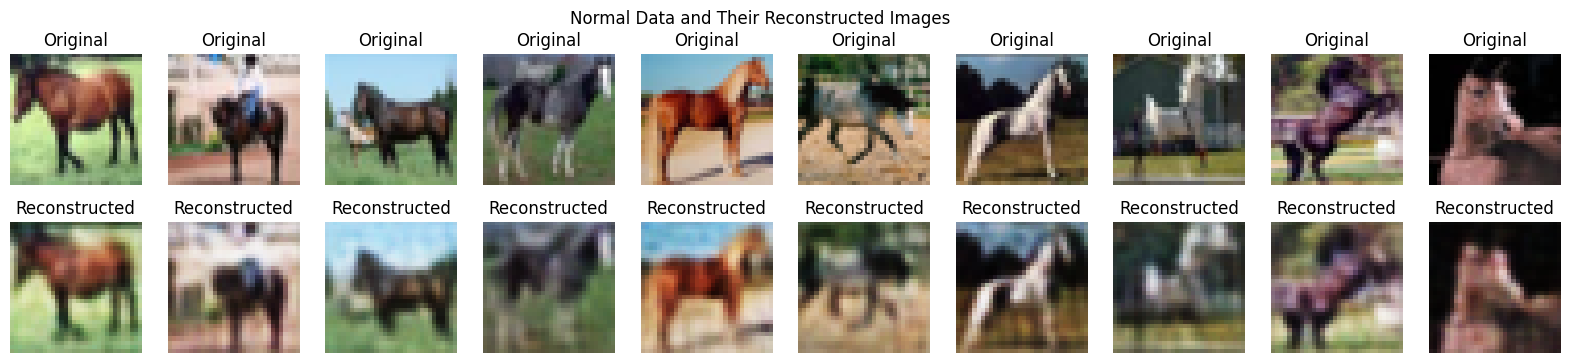

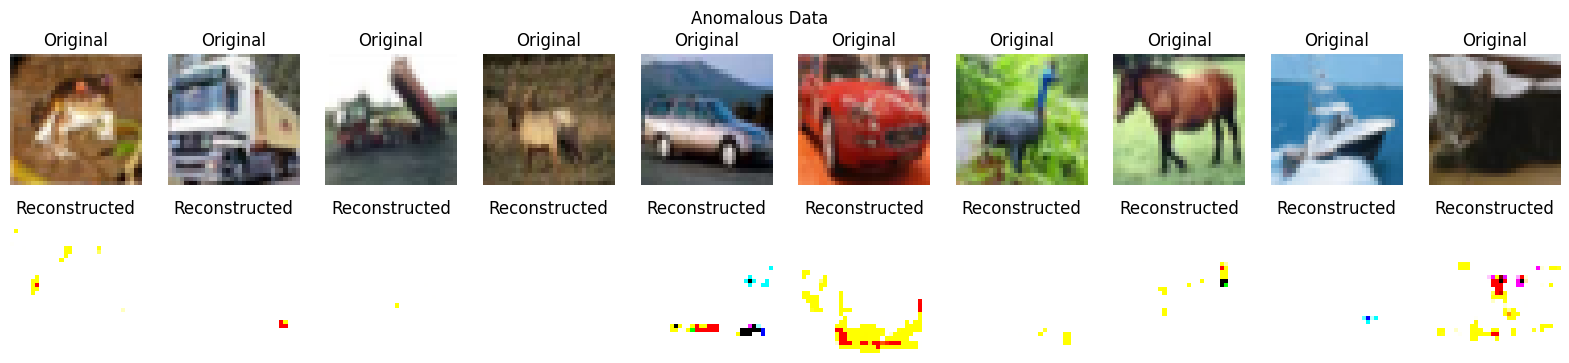

In [ ]:
import matplotlib.pyplot as plt

def plot_images(original_images, reconstructed_images, title):
    plt.figure(figsize=(20, 4))
    for i in range(10):
        # Original images
        plt.subplot(2, 10, i + 1)
        plt.imshow(original_images[i])
        plt.title('Original')
        plt.axis('off')

        # Reconstructed images
        plt.subplot(2, 10, i + 11)
        plt.imshow(reconstructed_images[i])
        plt.title('Reconstructed')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()
plot_images(normal_data[:10], normal_reconstructions[:10], 'Normal Data and Their Reconstructed Images')

plot_images(anomalous_data[:10], anomalous_reconstructions[:10], 'Anomalous Data')

In [ ]:
from sklearn.metrics import roc_auc_score

# Convert TensorFlow tensors to NumPy arrays
normal_predictions_np = normal_predictions.numpy().ravel()
anomalous_predictions_np = anomalous_predictions.numpy().ravel()

# Combine normal and anomalous predictions and errors
all_predictions = np.concatenate([normal_predictions_np, anomalous_predictions_np])
all_errors = np.concatenate([normal_errors.numpy().ravel(), anomalous_errors.numpy().ravel()])

# Create labels: 0 for normal (negative class), 1 for anomalous (positive class)
true_labels = np.concatenate([np.zeros_like(normal_predictions_np), np.ones_like(anomalous_predictions_np)])

# Calculate AUC
auc_score = roc_auc_score(true_labels, all_errors)

print("AUC Score:", auc_score)


AUC Score: 0.9993528459562324


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define transformations
datagen = ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.125,
    height_shift_range=0.125,
    zoom_range=[0.8, 1.2],
)

# Create generator for normal data
normal_generator = datagen.flow(normal_data, shuffle=False, batch_size=normal_data.shape[0])

# Create generator for anomalous data
anomalous_generator = datagen.flow(anomalous_data, shuffle=False, batch_size=anomalous_data.shape[0])

# Generate augmented images
normal_augmented_data = normal_generator.next()
anomalous_augmented_data = anomalous_generator.next()
anomalous_augmented_data = anomalous_augmented_data/ 255.0

In [ ]:
# Predict on augmented normal data
normal_augmented_reconstructions = model_plane.predict(normal_augmented_data)

# Predict on augmented anomalous data
anomalous_augmented_reconstructions = model_plane.predict(anomalous_augmented_data)

normal_aug_errors = tf.keras.losses.mean_squared_error(normal_augmented_data, normal_augmented_reconstructions)
anomalous_aug_errors = tf.keras.losses.mean_squared_error(anomalous_augmented_data, anomalous_augmented_reconstructions)

threshold_aug = np.mean(normal_aug_errors) + 3 * np.std(normal_aug_errors)
print(threshold_aug)

normal_aug_predictions = normal_aug_errors < threshold_aug
anomalous_aug_predictions = anomalous_aug_errors >= threshold_aug

1407/1407 [==============================] - 214s 152ms/step
0.023234686348587275


In [ ]:
from sklearn.metrics import roc_auc_score

# Convert TensorFlow tensors to NumPy arrays
normal_aug_predictions_np = normal_aug_predictions.numpy().ravel()
anomalous_aug_predictions_np = anomalous_aug_predictions.numpy().ravel()

# Combine normal and anomalous predictions and errors
all_predictions = np.concatenate([normal_aug_predictions_np, anomalous_aug_predictions_np])
all_errors = np.concatenate([normal_aug_errors.numpy().ravel(), anomalous_aug_errors.numpy().ravel()])

# Create labels: 0 for normal (negative class), 1 for anomalous (positive class)
true_labels = np.concatenate([np.zeros_like(normal_aug_predictions_np), np.ones_like(anomalous_aug_predictions_np)])

# Calculate AUC
auc_score = roc_auc_score(true_labels, all_errors)

print("AUC Score:", auc_score)

AUC Score: 0.49144058467160606
